Chegou na borda em 1.9500000000000002


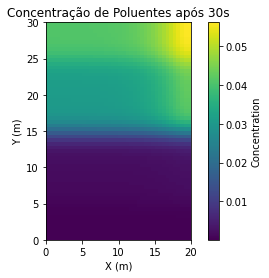

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Variáveis
def Simula(K = 1, tempoTotal = 30):
    n = 8
    alpha = 1
    Q_ponto = 100
    T_despejo = 3
    L_x = 30
    L_y = 20

    a = n / 1.4
    b = 60 / (n + 5)

    dx = 0.5
    dy = 0.5
    dt = 0.05
    
    xt = int(L_x / dx)
    yt = int(L_y / dy)
    tt = int(tempoTotal / dt)

    C = np.zeros((xt, yt))
    a_idx = int(a / dx)
    b_idx = int(b / dy)
    qC_ponto = Q_ponto / (dx * dy)

    basa = False
    for t in range(tt):
        C2 = np.copy(C)
        
        if t <= T_despejo/dt:
            C[a_idx, b_idx] += qC_ponto * dt
        
        for i in range(1, xt - 1):
            for j in range(1, yt - 1):

                u = alpha
                v = alpha * np.sin(np.pi * i * dx / 5)

                a1 = -v * (C[i + 1, j] - C[i - 1, j]) / (2 * dx)
                a2 = -u * (C[i, j + 1] - C[i, j - 1]) / (2 * dy)
                a3 = K * (C[i + 1, j] - 2 * C[i, j] + C[i - 1, j]) / dx ** 2
                a4 = K * (C[i, j + 1] - 2 * C[i, j] + C[i, j - 1]) / dy ** 2
                
                C2[i, j] = C[i, j] + dt * (a1 + a2 + a3 + a4)
                
                if C2[i, j] < 0:
                    C2[i, j] = 0
                    
        C2[0, :] = C2[1, :]
        C2[-1, :] = C2[-2, :]
        C2[:, 0] = C2[:, 1]
        C2[:, -1] = C2[:, -2]

        ponto_borda = C[a_idx][0]
        if (ponto_borda > 0.04) and not basa:
            print("Chegou na borda em {0}".format(t*dt))
            basa = True
        
        C = np.copy(C2)

    #Graficos
    plt.imshow(C, cmap='viridis', extent=[0, L_y, 0, L_x])
    plt.colorbar(label='Concentration')
    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.title(f'Concentração de Poluentes após {tempoTotal}s')
    plt.show()
    
Simula(1,30)


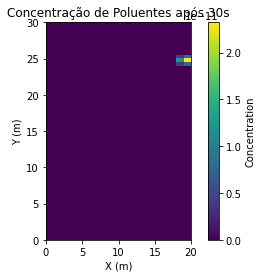

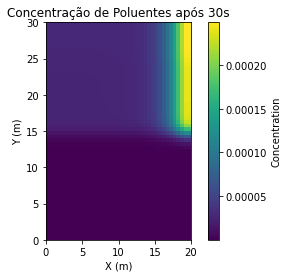

Chegou na borda em 0.5


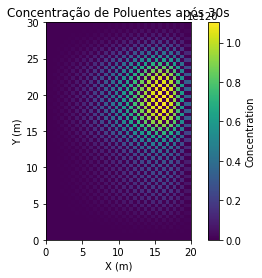

In [21]:
Simula(0.1, 30)
Simula(0.5, 30)
Simula(2, 30)

Chegou na borda em 1.9500000000000002


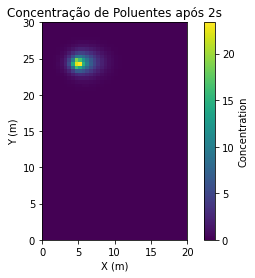

Chegou na borda em 1.9500000000000002


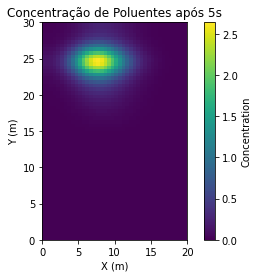

Chegou na borda em 1.9500000000000002


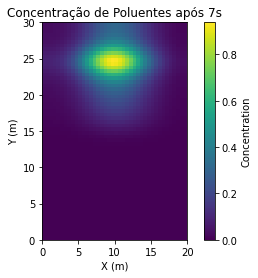

Chegou na borda em 1.9500000000000002


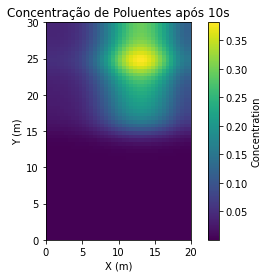

Chegou na borda em 1.9500000000000002


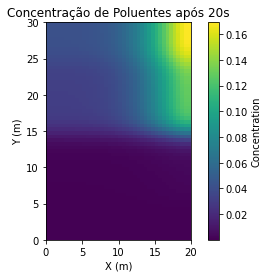

Chegou na borda em 1.9500000000000002


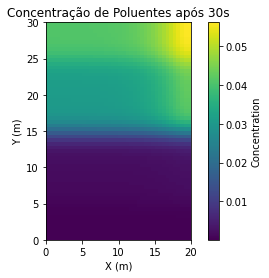

In [22]:
Simula(1,2)
Simula(1,5)
Simula(1,7)
Simula(1,10)
Simula(1,20)
Simula(1,30)



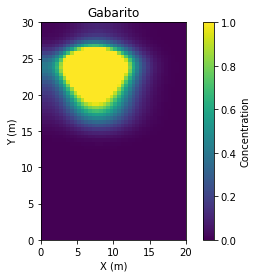

IndexError: index 40 is out of bounds for axis 0 with size 40

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Variáveis
def Simula(K = 1, tempoTotal = 30):
    
    Q_ponto = 100
    T_despejo = 3
    L_x = 30
    L_y = 20
    n = 10 #número do grupo
    a = n/1.4
    b = (60/(n+5))
    dx = 0.5
    dy = 0.5
    dt = (0.25*dx**2)/1.5
    xt = int(L_x / dx)
    yt = int(L_y / dy)
    tt = int(tempoTotal / dt)

    C = np.zeros((xt, yt))
    a_idx = int(a / dx)
    b_idx = int(b / dy)
    qC_ponto = Q_ponto / (dx * dy)

    for t in range(tt):
        C2 = np.copy(C)
        
        if t <= T_despejo/dt:
            C[a_idx, b_idx] += qC_ponto * dt
        
        for i in range(1, xt - 1):
            for j in range(1, yt - 1):

                u = 1
                v = np.sin(np.pi * i * dx/5)

                a1 = -v * (C[i + 1, j] - C[i - 1, j]) / (2 * dx)
                a2 = -u * (C[i, j + 1] - C[i, j - 1]) / (2 * dy)
                a3 = K * (C[i + 1, j] - 2 * C[i, j] + C[i - 1, j]) / dx ** 2
                a4 = K * (C[i, j + 1] - 2 * C[i, j] + C[i, j - 1]) / dy ** 2
                
                C2[i, j] = C[i, j] + dt * (a1 + a2 + a3 + a4)
                
                if C2[i, j] < 0:
                    C2[i, j] = 0
                    
        C2[0, :] = C2[1, :]
        C2[-1, :] = C2[-2, :]
        C2[:, 0] = C2[:, 1]
        C2[:, -1] = C2[:, -2]
        
        C = np.copy(C2)

    #Graficos
    plt.imshow(C, cmap='viridis', extent=[0, L_y, 0, L_x], vmax=1) 
    # aqui para ficar igual ao gabarito é necessário implementar o v_max=1 no imshow
    plt.colorbar(label='Concentration')
    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.title(f'Gabarito')
    plt.show()
    print(C[40][40])
    print(np.max(C))
    
Simula(tempoTotal=5)
